In [1]:
import pandas as pd
dataset = pd.read_csv("C:/Users/hp/Desktop/Data science/seventeen/Machine Learning Project 1/Datasets/Real estate.csv")
dataset


,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [3]:
### Data Exploration
# Shape of the dataset
print("Data Shape:", dataset.shape)

Data Shape: (414, 8)


In [5]:
# Checking for missing values
print("\nMissing Values:\n", dataset.isnull().sum())


Missing Values:
 No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64


In [7]:
# Data information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [9]:
# Descriptive statistics
dataset.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [11]:
# Examine Correlations
# Compute the correlation matrix
correlation_matrix = dataset.corr()

# Display the correlation matrix
print(correlation_matrix)

                                              No  X1 transaction date  \
No                                      1.000000            -0.048658   
X1 transaction date                    -0.048658             1.000000   
X2 house age                           -0.032808             0.017549   
X3 distance to the nearest MRT station -0.013573             0.060880   
X4 number of convenience stores        -0.012699             0.009635   
X5 latitude                            -0.010110             0.035058   
X6 longitude                           -0.011059            -0.041082   
Y house price of unit area             -0.028587             0.087491   

                                        X2 house age  \
No                                         -0.032808   
X1 transaction date                         0.017549   
X2 house age                                1.000000   
X3 distance to the nearest MRT station      0.025622   
X4 number of convenience stores             0.049593   
X5 lat

### Visualize Correlations with a Heatmap

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
# Set the size of the heatmap
plt.figure(figsize=(10, 8))

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Axes: >

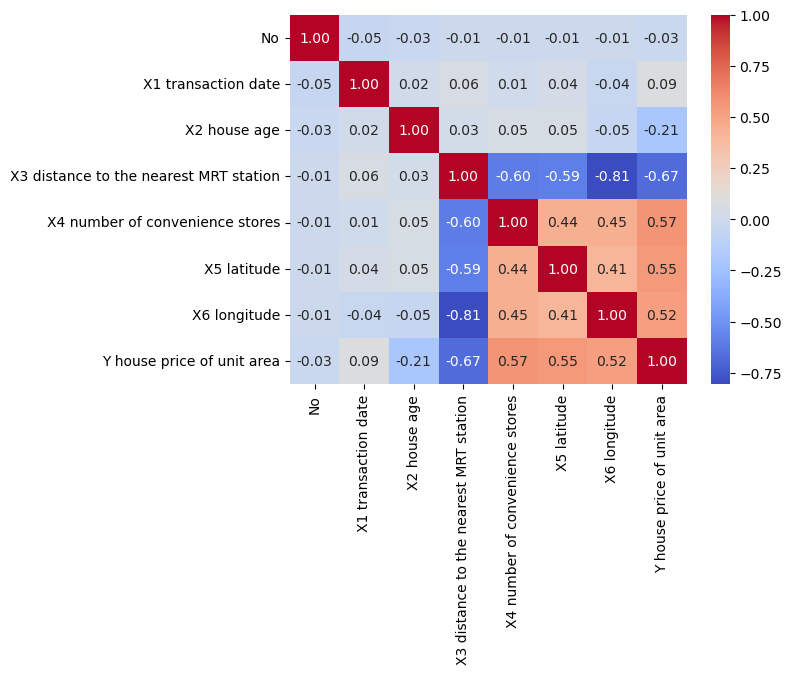

In [16]:
# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")

In [17]:
# Strongly Consider: X4 number of convenience stores, X3 distance to the nearest MRT station, X5 latitude, X6 longitude.
# Potentially Include: X2 house age (though weak, it might contribute when combined with other features).

In [18]:
# Select relevant features (excluding 'No' and the target variable 'Y house price of unit area')
X = dataset.drop(columns=["No", "Y house price of unit area", "X1 transaction date", "X2 house age" ])
X

,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,84.87882,10,24.98298,121.54024
1,306.59470,9,24.98034,121.53951
2,561.98450,5,24.98746,121.54391
3,561.98450,5,24.98746,121.54391
4,390.56840,5,24.97937,121.54245
...,...,...,...,...
409,4082.01500,0,24.94155,121.50381
410,90.45606,9,24.97433,121.54310
411,390.96960,7,24.97923,121.53986
412,104.81010,5,24.96674,121.54067


In [19]:
# Calculate VIF for each feature
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [20]:
# Display VIF results
print(vif_data)

                                  Feature           VIF
0  X3 distance to the nearest MRT station  2.947371e+00
1         X4 number of convenience stores  4.709593e+00
2                             X5 latitude  5.874996e+06
3                            X6 longitude  5.875236e+06


In [21]:
# Check correlation between X5 and X6
print(dataset[['X5 latitude', 'X6 longitude']].corr())

              X5 latitude  X6 longitude
X5 latitude      1.000000      0.412924
X6 longitude     0.412924      1.000000


In [22]:
# Select relevant features 
Z = dataset.drop(columns=["No", "Y house price of unit area", "X1 transaction date", "X2 house age", "X5 latitude"])
Z

,X3 distance to the nearest MRT station,X4 number of convenience stores,X6 longitude
0,84.87882,10,121.54024
1,306.59470,9,121.53951
2,561.98450,5,121.54391
3,561.98450,5,121.54391
4,390.56840,5,121.54245
...,...,...,...
409,4082.01500,0,121.50381
410,90.45606,9,121.54310
411,390.96960,7,121.53986
412,104.81010,5,121.54067


In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
# Calculate VIF for each feature
vif_dataset = pd.DataFrame()
vif_dataset["Feature"] = Z.columns
vif_dataset["VIF"] = [variance_inflation_factor(Z.values, i) for i in range(Z.shape[1])]

In [24]:
# Display the VIF results
print(vif_dataset)

                                  Feature       VIF
0  X3 distance to the nearest MRT station  2.729604
1         X4 number of convenience stores  4.610221
2                            X6 longitude  7.463264


In [25]:
# Recommendations
print(dataset[['X6 longitude', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores']].corr())

                                        X6 longitude  \
X6 longitude                                1.000000   
X3 distance to the nearest MRT station     -0.806317   
X4 number of convenience stores             0.449099   

                                        X3 distance to the nearest MRT station  \
X6 longitude                                                         -0.806317   
X3 distance to the nearest MRT station                                1.000000   
X4 number of convenience stores                                      -0.602519   

                                        X4 number of convenience stores  
X6 longitude                                                   0.449099  
X3 distance to the nearest MRT station                        -0.602519  
X4 number of convenience stores                                1.000000  


In [26]:
# Drop X6
# Select relevant features 
D = dataset.drop(columns=["No", "Y house price of unit area", "X6 longitude", "X5 latitude","X1 transaction date","X2 house age"])
D

,X3 distance to the nearest MRT station,X4 number of convenience stores
0,84.87882,10
1,306.59470,9
2,561.98450,5
3,561.98450,5
4,390.56840,5
...,...,...
409,4082.01500,0
410,90.45606,9
411,390.96960,7
412,104.81010,5


In [27]:
# Recalculate VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["Feature"] = D.columns
vif_data["VIF"] = [variance_inflation_factor(D.values, i) for i in range(D.shape[1])]

In [28]:
print(vif_data)

                                  Feature       VIF
0  X3 distance to the nearest MRT station  1.074218
1         X4 number of convenience stores  1.074218


### Independent of errors

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [46]:
# In multiple regression independent variables are in 2D and the dependent variable is in 1D. We verify independence errors after predicting
X = dataset[["X3 distance to the nearest MRT station", "X4 number of convenience stores"]]  # 2D DataFrame
y = dataset["Y house price of unit area"]  # 1D Series

In [47]:
features = dataset[["X1 transaction date", "X2 house age", "X3 distance to the nearest MRT station", "X4 number of convenience stores", "X5 latitude", "X6 longitude"]]
target = dataset["Y house price of unit area"]

In [51]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [53]:
#Fit the Linear Regression Model

In [55]:
# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [57]:
# Predict on the training set to get residuals
y_pred = model.predict(X_train)
residuals = y_train - y_pred
residuals

7       1.585265
194    11.496657
19     -0.130868
176     6.047813
367   -10.543805
         ...    
71      1.284310
106    -0.950820
270    78.100057
348     8.423195
102     8.739934
Name: Y house price of unit area, Length: 289, dtype: float64

In [59]:
# Perform the Durbin-Watson Test
from statsmodels.stats.stattools import durbin_watson

# Calculate the Durbin-Watson statistic
dw_stat = durbin_watson(residuals)

dw_stat

2.0421414690588886

### Evaluate the Model

In [62]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

In [64]:
# Predict on the test set
y_test_pred = model.predict(X_test)

In [66]:
# R² Score
r2 = r2_score(y_test, y_test_pred)
r2

0.4779949696082122

In [68]:
# Adjusted R²
n = X_test.shape[0]  # Number of observations
p = X_test.shape[1]  # Number of predictors
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))
adjusted_r2

0.4694375100935928

In [70]:
# MAE
mae = mean_absolute_error(y_test, y_test_pred)
mae

7.0828234772543155

In [72]:
# Method 3 RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
rmse

9.343037613291035

In [74]:
# Get coefficients
coefficients = model.coef_

# Get intercept
intercept = model.intercept_

# Display results
print(f"Coefficients: {coefficients}")
print(f"Intercept: {intercept}")

Coefficients: [-0.00580028  1.18358398]
Intercept: 39.68140727118261


In [76]:
# Let us solve the multicollineariy problem by scaling our features so that to improve our model

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [80]:
# selecting our features and target

In [82]:
features = dataset[["X1 transaction date", "X2 house age", "X3 distance to the nearest MRT station", "X4 number of convenience stores", "X5 latitude", "X6 longitude"]]
target = dataset["Y house price of unit area"]

In [84]:
# Splittng 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [86]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.3, random_state=42)

In [88]:
from sklearn.preprocessing import StandardScaler

In [90]:
# Scale the train and test separatly and we do not need to scale the target.
scaler = StandardScaler()
features_train_scaled = scaler.fit_transform(features_train)
features_test_scaled = scaler.transform(features_test)

In [92]:
# Before fitting the model let us check multicollinearity assumption
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Convert scaled features back to a DataFrame (optional for clarity)
features_scaled_df = pd.DataFrame(features_train_scaled, columns=features.columns)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = features.columns
vif_data["VIF"] = [variance_inflation_factor(features_scaled_df.values, i) for i in range(features_scaled_df.shape[1])]

print(vif_data)

                                  Feature       VIF
0                     X1 transaction date  1.014127
1                            X2 house age  1.011238
2  X3 distance to the nearest MRT station  4.411499
3         X4 number of convenience stores  1.639377
4                             X5 latitude  1.513851
5                            X6 longitude  3.120753


In [94]:
# Fit the model with features_train_scale and target_train
model = LinearRegression()
model.fit(features_train_scaled, target_train)

LinearRegression()

In [96]:
# Predict on the training set to get the residual
# Step 1: Predict on the training set
target_train_pred = model.predict(features_train_scaled)

# Step 2: Calculate residuals
residuals = target_train - target_train_pred

# Step 3: Display residuals
print(residuals)

7      -0.620748
194    14.192452
19      0.743704
176     7.339871
367    -9.711646
         ...    
71      5.034582
106    -0.829733
270    74.332923
348     7.085922
102     7.336913
Name: Y house price of unit area, Length: 289, dtype: float64


In [98]:
# Let us check independence of errors

In [100]:
from statsmodels.stats.stattools import durbin_watson

In [102]:
# Calculate the Durbin-Watson statistic
dw_stat = durbin_watson(residuals)

print(f"Durbin-Watson Statistic: {dw_stat}")

Durbin-Watson Statistic: 2.012930843584445


In [104]:
# Evaluate the model
r2_score = model.score(features_test_scaled, target_test)
print(f"R^2 Score: {r2_score}")

R^2 Score: 0.5600638168604299


In [115]:
import warnings
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Suppress FutureWarning
warnings.simplefilter("ignore", FutureWarning)

# Calculate RMSE
rmse = mean_squared_error(target_test, target_test_pred, squared=False)

# Calculate MAE
mae = mean_absolute_error(target_test, target_test_pred)

# Print results
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")


RMSE: 8.577201136064236
MAE: 6.1848363400968545


In [117]:
coefficients = model.coef_

# Get intercept
intercept = model.intercept_

# Display results
print(f"Coefficients: {coefficients}")
print(f"Intercept: {intercept}")

Coefficients: [ 1.65121984 -2.76093494 -6.40443563  3.2054653   2.9892929  -0.78771855]
Intercept: 38.44186851211001


### Deployement method

In [251]:
# Step 1: Save and Load a Model Using Pickle (Import the Pickle Library)
import pickle

In [253]:
# Step 2: Save the Model while named your model(model_name.pkl
with open('house_price_prediction.sav', 'wb') as file:
    pickle.dump(model, file)

In [255]:
# Explaination of the term in that code:
# 'wb': Write in binary mode.
# model.pkl: The file where your model is saved.

In [257]:
# step 3: Load the Model Use pickle.load() to load the saved model when need: using model_name.pkl
with open('house_price_prediction.sav', 'rb') as file:
    loaded_model = pickle.load(file)

In [259]:
# Step 4:  Make Predictions (not compulsary, we have already done it)
predictions = loaded_model.predict(features_test_scaled)

In [261]:
# step 5: Evaluate the Model (not compulsary, we have already done it)
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(target_test, predictions)
r2 = r2_score(target_test, predictions)
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 73.56837932850163
R² Score: 0.5600638168604299


In [263]:
# Predicting New_data point
# Exemple which matches with our independent variables
new_data = [[2023, 15, 150.5, 3, 24.967, 121.541]]

In [265]:
# Convert new_data to DataFrame with the same feature names
new_data_df = pd.DataFrame(new_data, columns=[
    "X1 transaction date", 
    "X2 house age",
    "X3 distance to the nearest MRT station",
    "X4 number of convenience stores",
    "X5 latitude",
    "X6 longitude"
])

In [267]:
# After converting our new_data to DataFrame now we scale it
new_data_scaled = scaler.transform(new_data_df)

In [269]:
# Make Predictions (Use the scaled data to make predictions with the loaded model)
new_prediction = loaded_model.predict(new_data_scaled)
print("Prediction for the new data:", new_prediction)

Prediction for the new data: [98.98490687]
